In [1]:
#Importing libraries
import pandas as pd
import numpy as np
import random
import os
import cv2
from time import time
import matplotlib.pyplot as plt
from matplotlib.image import imread
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D
from PIL import Image
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import accuracy_score
np.random.seed(42)

from sklearn.metrics import confusion_matrix
import seaborn as sns

from matplotlib import style
style.use('fivethirtyeight')

In [11]:
#Import the functions that I defined using python built-in magic command "run".
%run visualize_classes.ipynb 
%run traindata_statistics.ipynb
%run visualize_testdata.ipynb
%run load_traindata.ipynb
%run shuffle_data.ipynb
%run split_data.ipynb
%run one_hot_encoding.ipynb
%run configure_network.ipynb
%run create_model_1.ipynb
%run train_model.ipynb
%run load_testdata.ipynb
%run evaluate.ipynb

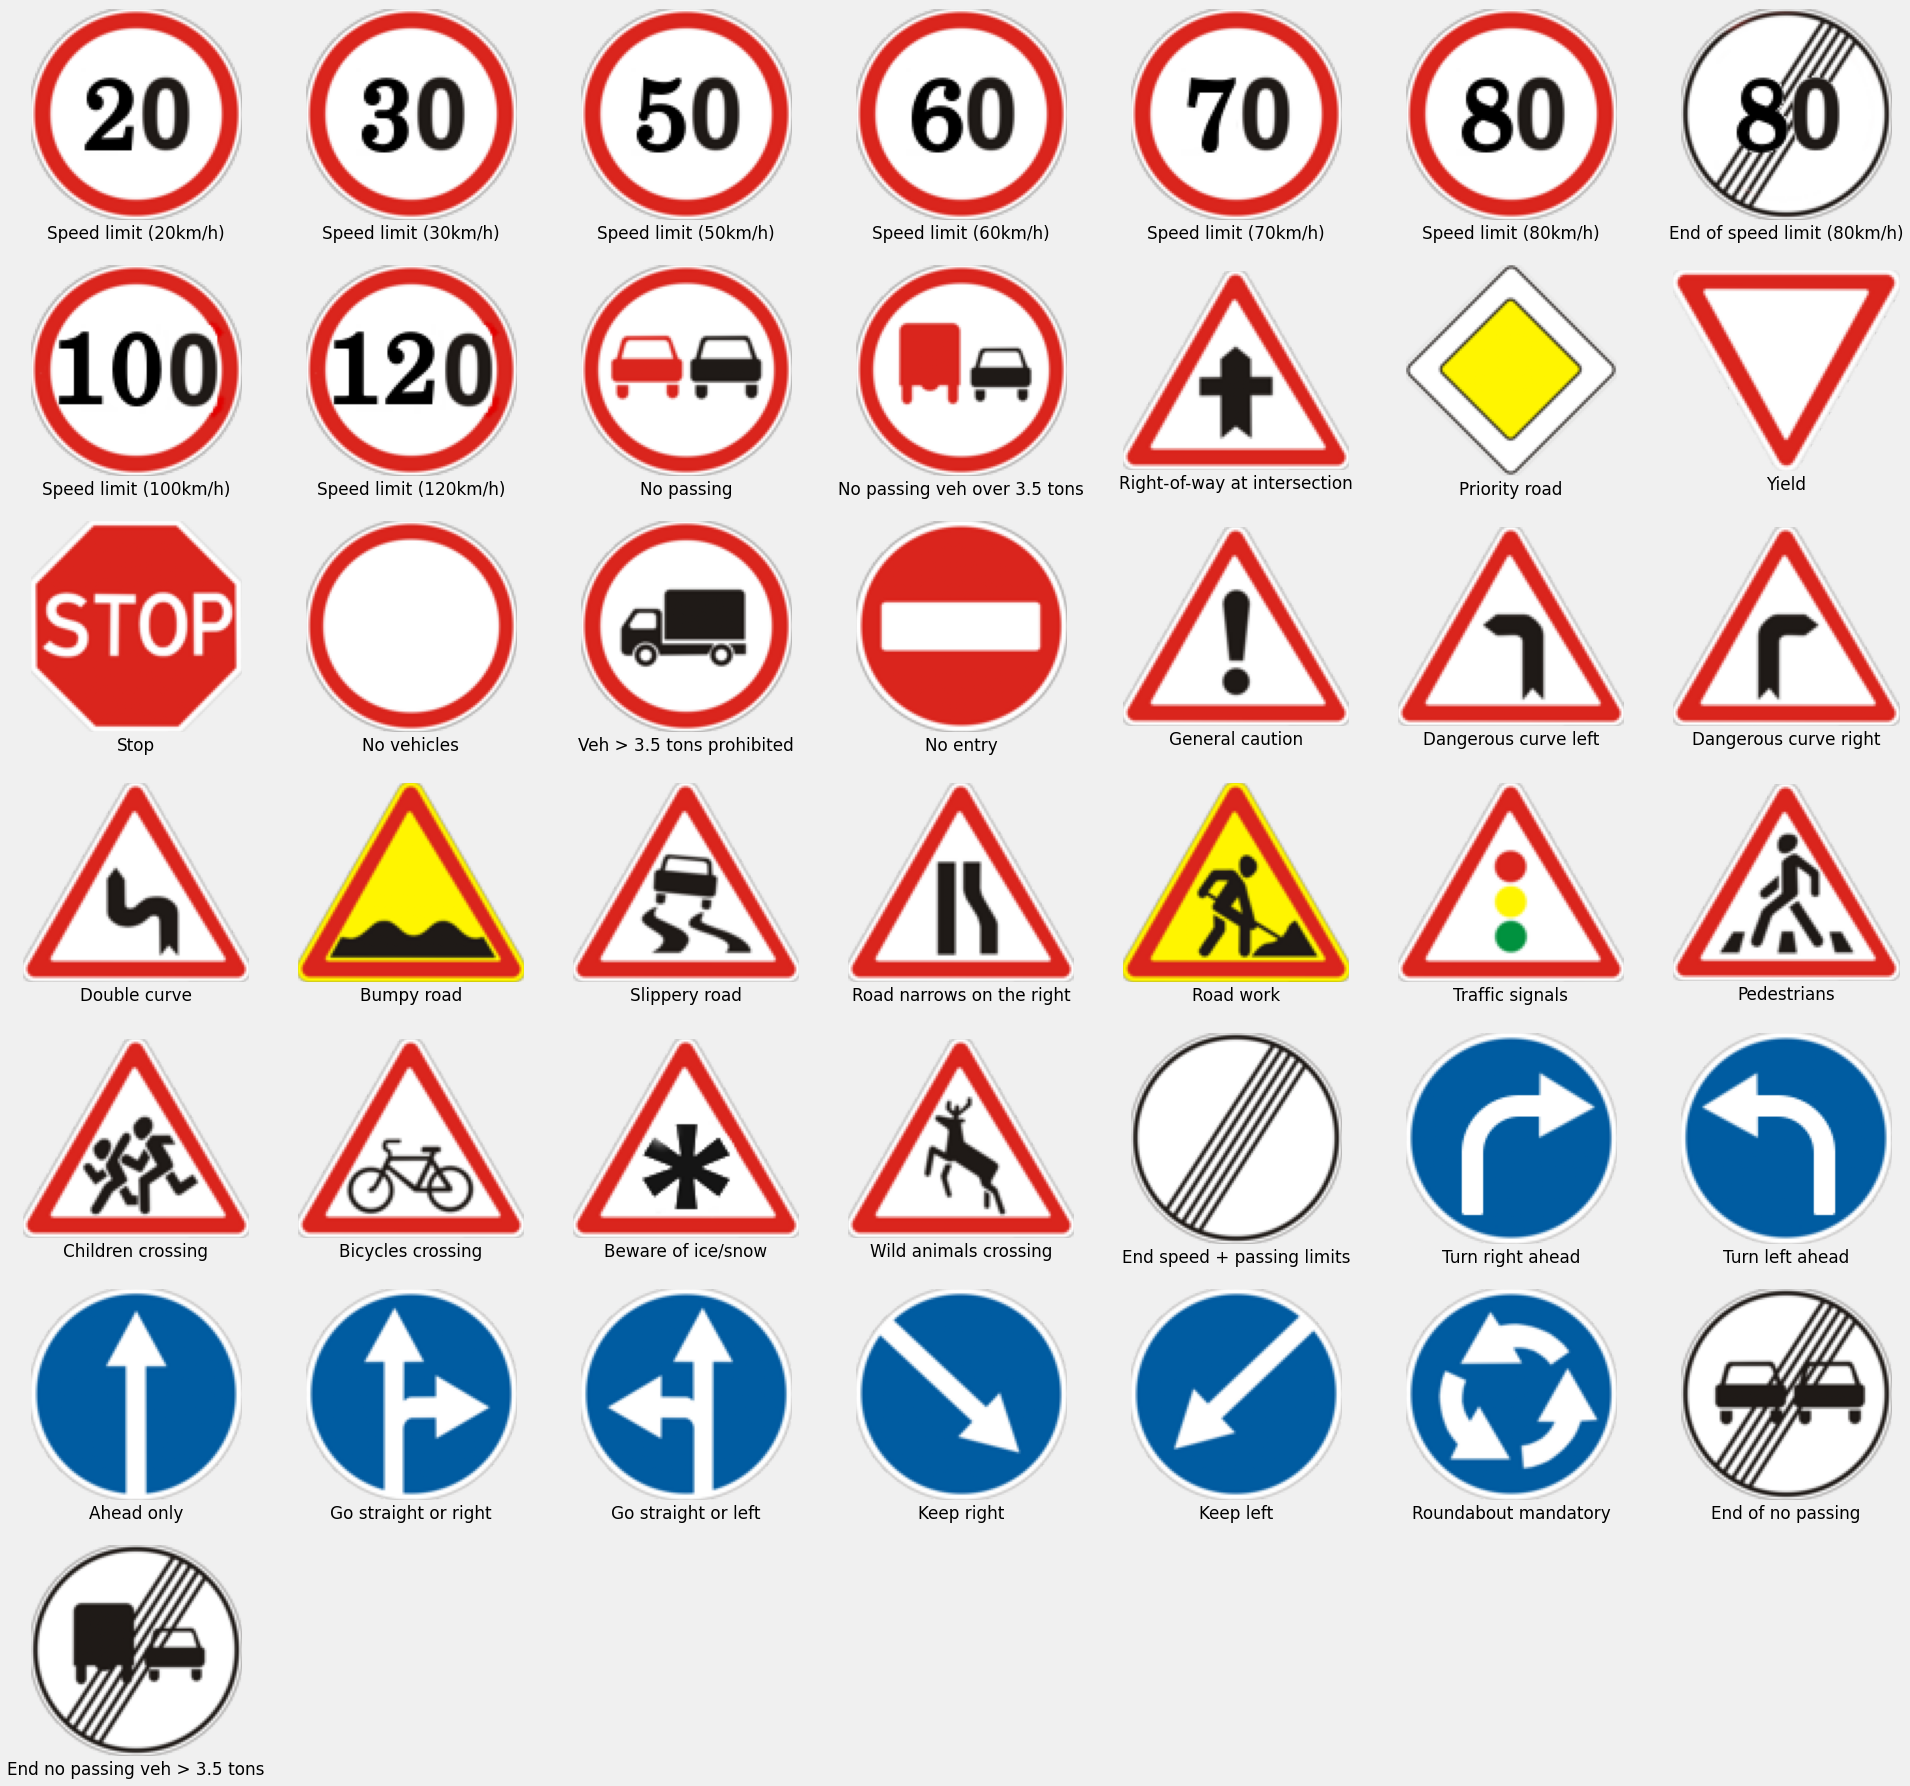

In [12]:
#Define the data directory and call visualize_classes function to print the traffic sign and label for each class
data_dir = '/Users/shahiraamin/Desktop/archive'
classes = visualize_classes(data_dir)

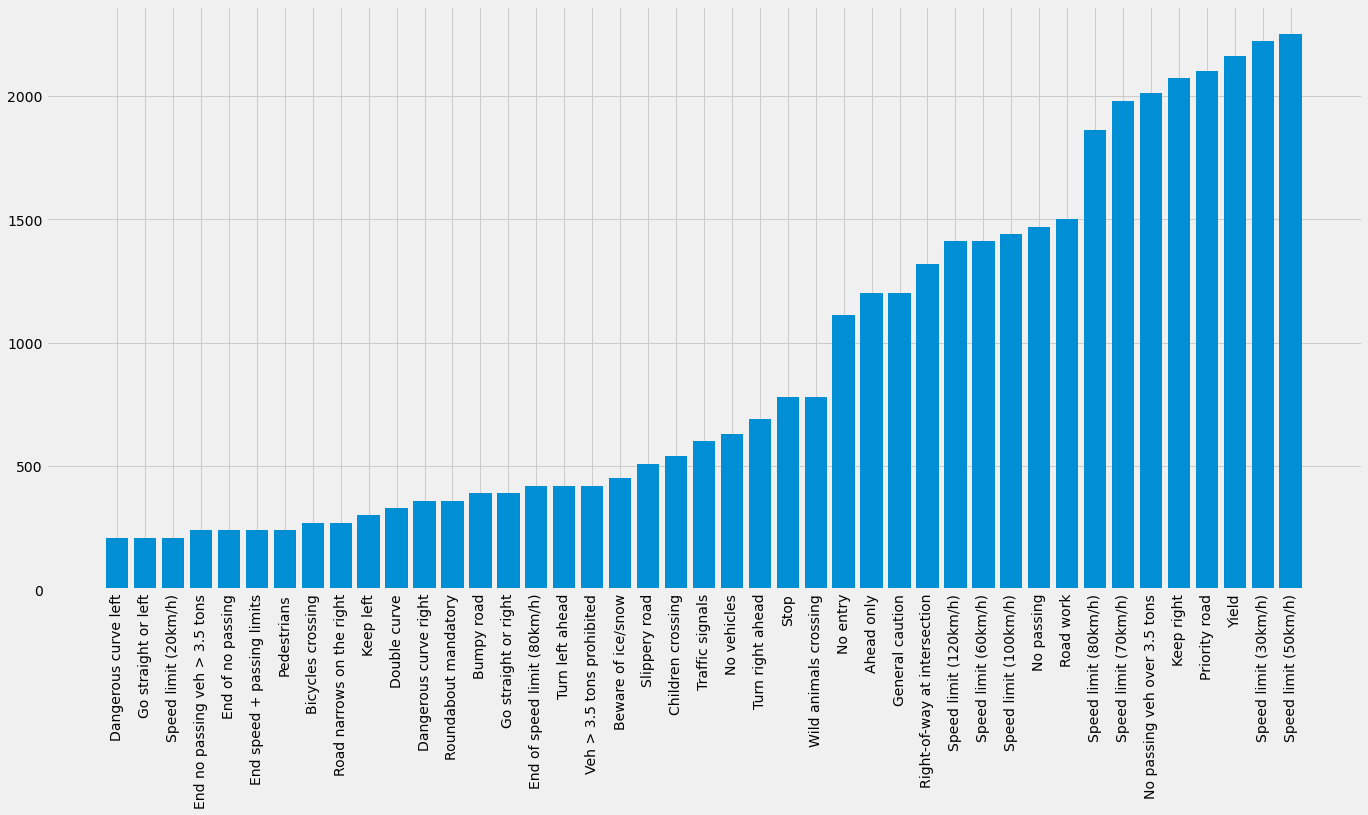

39209


In [13]:
#Call traindata_statistics function to calculate the number of training images provided in the dataset for each class
sum_traindata = traindata_statistics(data_dir)
print(sum_traindata)

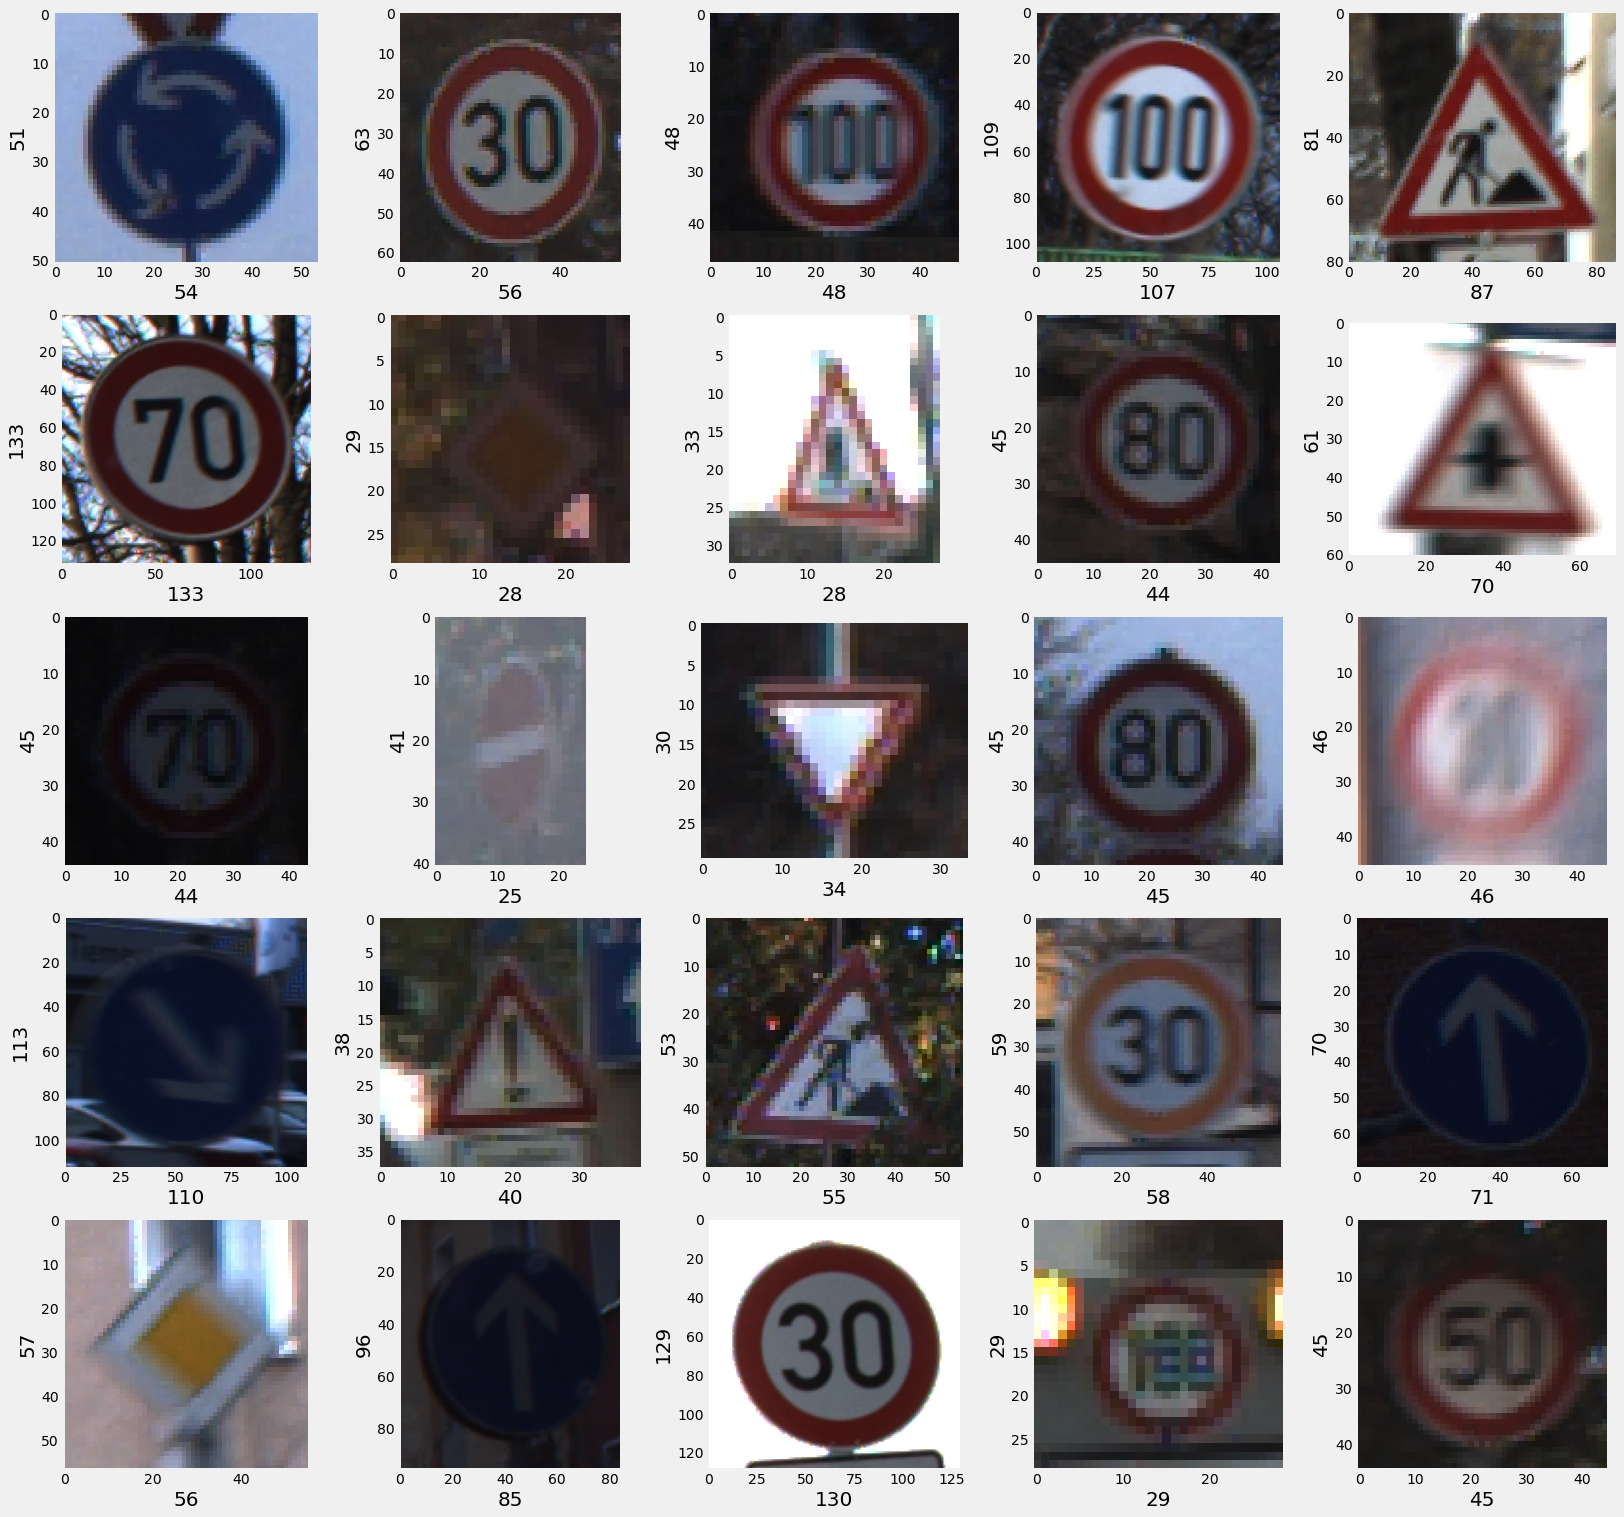

In [14]:
#Visualize 25 random samples from test data
visualize_testdata(data_dir)

In [15]:
#Define image width, height, and number of channels
IMG_HEIGHT = 90
IMG_WIDTH = 90
channels = 3
#Load the training data
img_data,img_labels = load_traindata(IMG_HEIGHT,IMG_WIDTH,len(classes),data_dir)
#Shuffle the training data
img_data,img_labels = shuffle_data(img_data,img_labels)

(39209, 90, 90, 3) (39209,)
(39209, 90, 90, 3) (39209,)


In [16]:
#split the training data into training set and validation set
X_train, X_val, y_train, y_val = split_data(img_data,img_labels)

X_train.shape (27446, 90, 90, 3)
X_valid.shape (11763, 90, 90, 3)
y_train.shape (27446,)
y_valid.shape (11763,)


In [17]:
#one hot encoding of training labels and validation labels
ytrain = one_hot_encoding(y_train,len(classes))
yval = one_hot_encoding(y_val,len(classes))

ytrain.shape

(27446, 43)

In [18]:
#Configure the network parameters
lr,opt,epochs,batch_size = configure_network()
print(lr,epochs,batch_size)

0.001 30 50


In [20]:
#Create the model
model = create_model_1(IMG_HEIGHT,IMG_WIDTH,channels)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 42, 42, 4)         592       
                                                                 
 conv2d_8 (Conv2D)           (None, 19, 19, 8)         808       
                                                                 
 conv2d_9 (Conv2D)           (None, 9, 9, 16)          1168      
                                                                 
 conv2d_10 (Conv2D)          (None, 4, 4, 32)          4640      
                                                                 
 conv2d_11 (Conv2D)          (None, 3, 3, 16)          2064      
                                                                 
 conv2d_12 (Conv2D)          (None, 2, 2, 8)           520       
                                                                 
 conv2d_13 (Conv2D)          (None, 1, 1, 4)          

Epoch 1/30
549/549 [==============================] - 65s 118ms/step - loss: 3.0324 - accuracy: 0.1655 - val_loss: 2.2131 - val_accuracy: 0.3099
Epoch 2/30
549/549 [==============================] - 59s 108ms/step - loss: 2.1189 - accuracy: 0.3200 - val_loss: 1.7799 - val_accuracy: 0.4092
Epoch 3/30
549/549 [==============================] - 53s 96ms/step - loss: 1.8297 - accuracy: 0.3853 - val_loss: 1.6143 - val_accuracy: 0.4412
Epoch 4/30
549/549 [==============================] - 52s 95ms/step - loss: 1.6875 - accuracy: 0.4303 - val_loss: 1.4016 - val_accuracy: 0.5244
Epoch 5/30
549/549 [==============================] - 54s 98ms/step - loss: 1.5294 - accuracy: 0.4817 - val_loss: 1.2711 - val_accuracy: 0.5652
Epoch 6/30
549/549 [==============================] - 54s 99ms/step - loss: 1.3917 - accuracy: 0.5232 - val_loss: 1.1290 - val_accuracy: 0.6002
Epoch 7/30
549/549 [==============================] - 53s 97ms/step - loss: 1.2915 - accuracy: 0.5575 - val_loss: 1.0158 - val_accurac

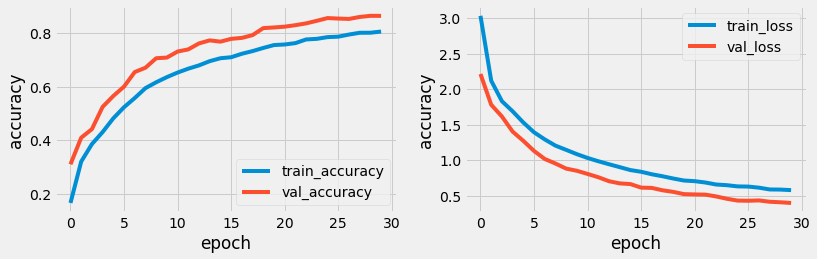

In [21]:
#Train the model
train_model(model,X_train,X_val,ytrain,yval,lr,opt,epochs,batch_size)

In [22]:
#Load test data
X_test, y_test = load_testdata(IMG_HEIGHT,IMG_WIDTH,data_dir)

(12630, 90, 90, 3) (12630,)


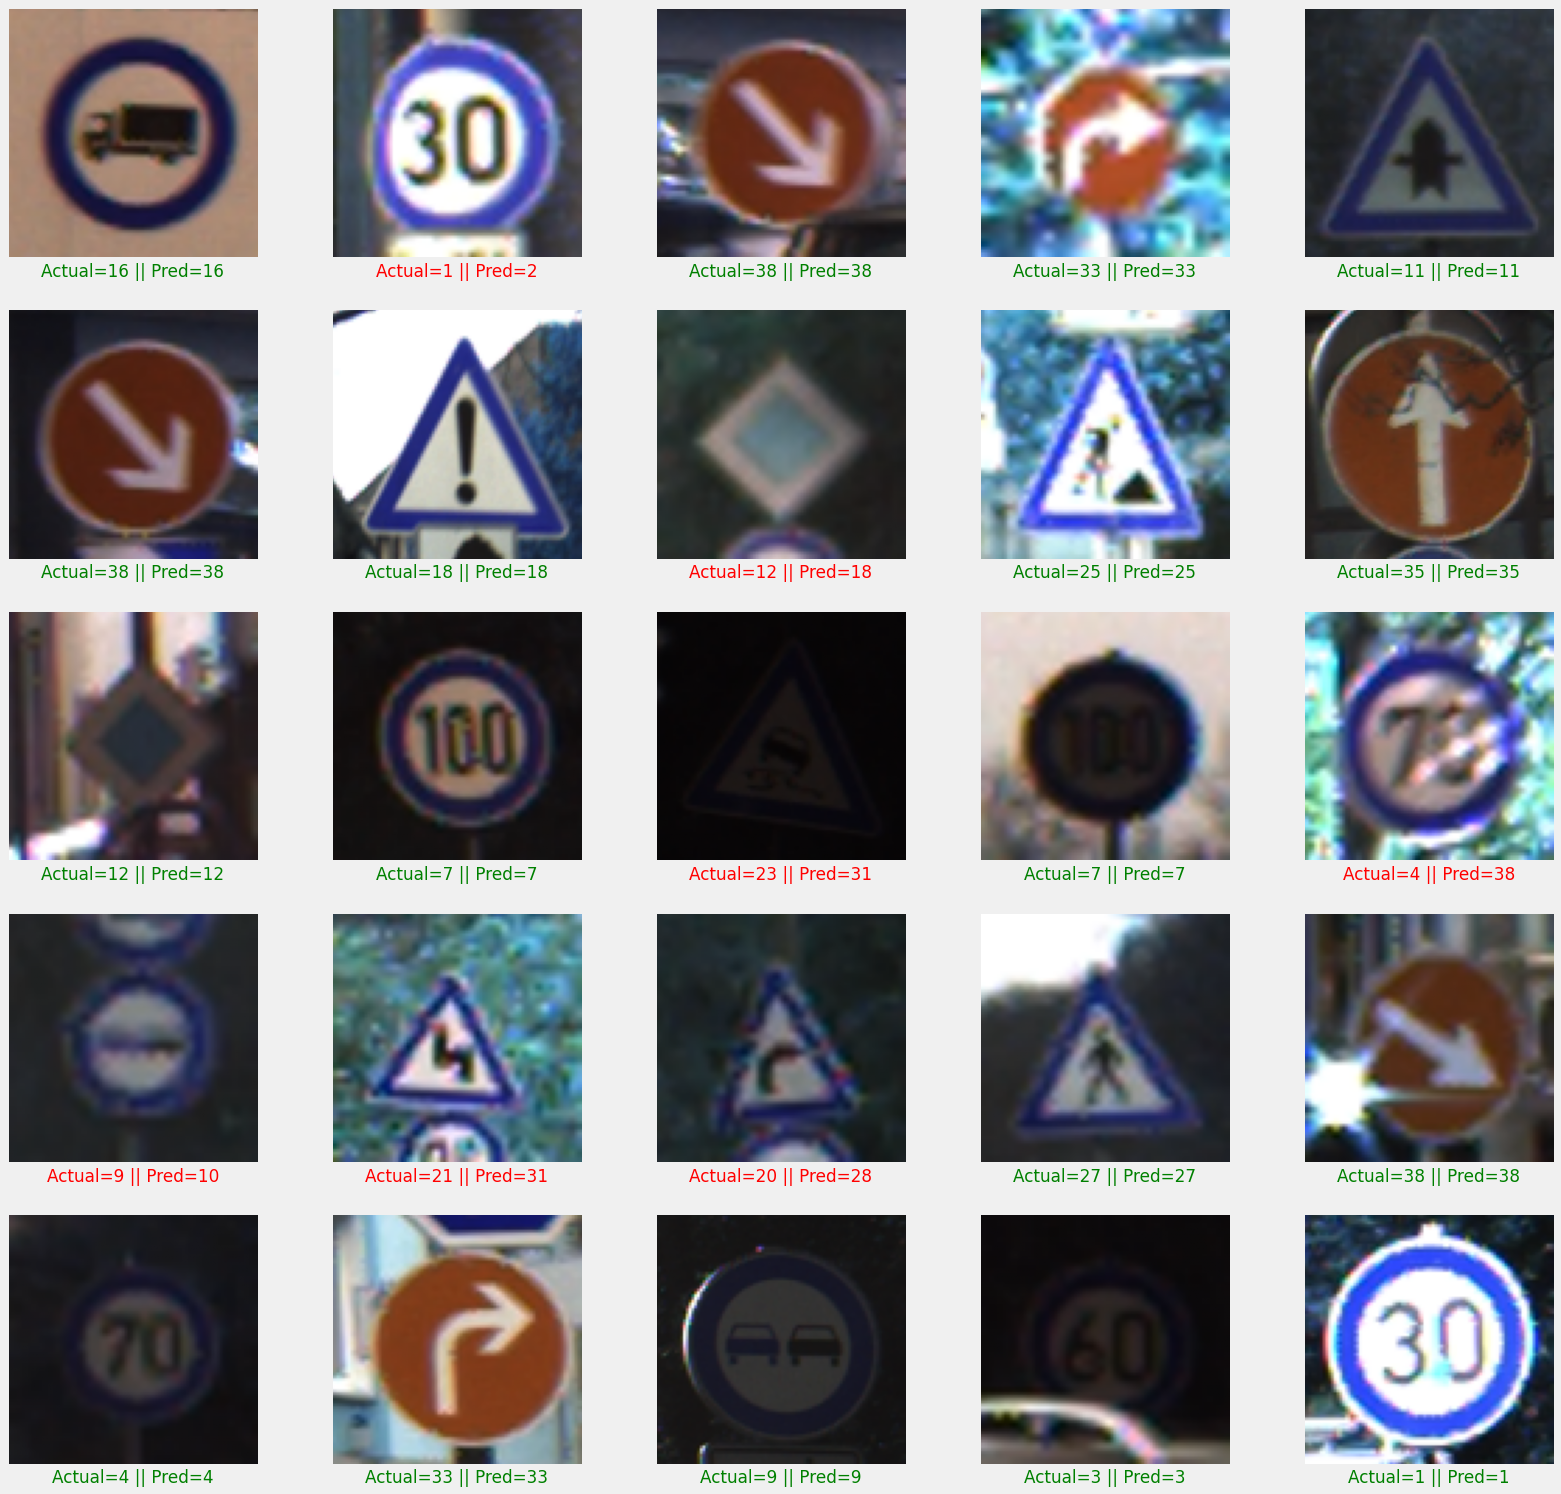

Test Data accuracy:  81.91607284243864


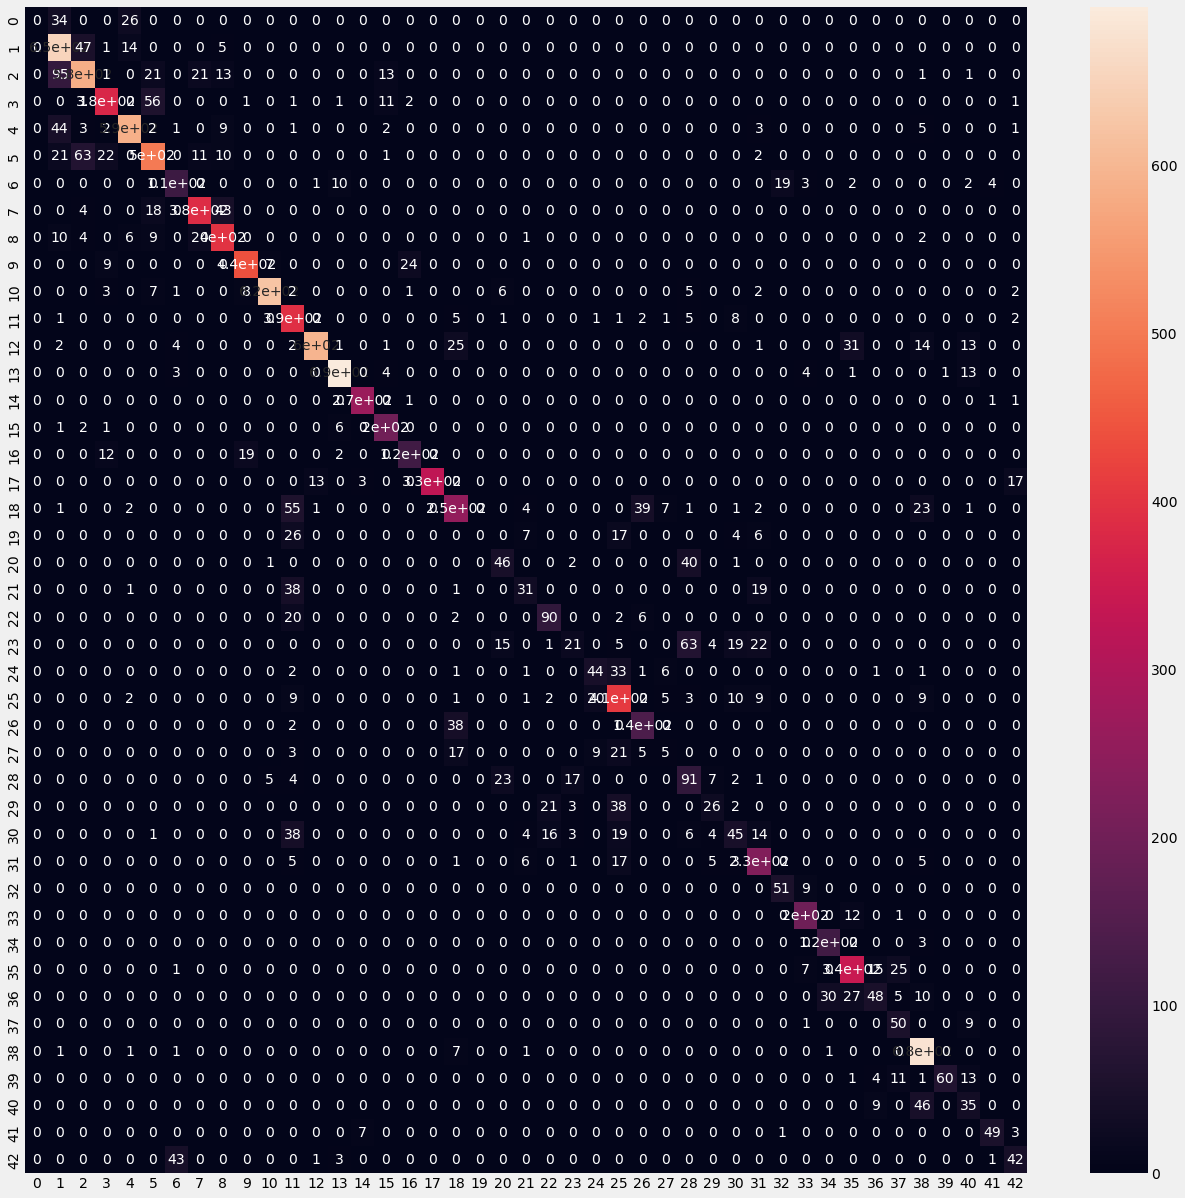

In [24]:
#Evaluate the trained model on the test data
#This will print the first 25 images in the test data along with their actual and predicated class numbers as x labels
#This will also print the test accuracy (%) and confusion matrix
evaluate(X_test,y_test,model)

In [25]:
count = 0
for i in range(len(y_test)):
    if y_test[i]==0:
        count+=1

In [26]:
count

60